## $k$-NN Classification

In [1]:
# import all the stuff
import numpy as np
import pandas as pd
from scipy.stats import randint
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Read in data

In [2]:
file_path = '../data/processed'
train_df = pd.read_csv(file_path + '/train.csv')
X_train, y_train = train_df.drop(columns=['TYPE1']), train_df['TYPE1']

## Make the pipeline

In [3]:
categorical_variables = ['TYPE2', 'COLOR', 'ABILITY1', 'ABILITY2', 'ABILITY HIDDEN']
numeric_variables = ['HEIGHT', 'WEIGHT', 'HP', 'ATK', 'DEF', 'SP_ATK', 'SP_DEF', 'SPD']
passthrough_variables = ['LEGENDARY', 'MEGA_EVOLUTION']
drop_variables = ['NUMBER', 'CODE', 'SERIAL', 'NAME', 'GENERATION', 'TOTAL']

preprocessor = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), categorical_variables),
    (StandardScaler(), numeric_variables),
    ('passthrough', passthrough_variables),
    ('drop', drop_variables)
)

knn_pipe = make_pipeline(
    preprocessor, KNeighborsClassifier()
)

## Hyperparameter optimization

In [4]:
param_grid = {
    'kneighborsclassifier__n_neighbors': range(2, 20)
}

random_search = GridSearchCV(
    knn_pipe, 
    param_grid,
    cv=5,
    return_train_score=True
)

random_search.fit(X_train, y_train)

c:\Users\carol\miniconda3\envs\poketype\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['TYPE2',
                                                                          'COLOR',
                                                                          'ABILITY1',
                                                                          'ABILITY2',
                                                                          'ABILITY '
                                                                          'HIDDEN']),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         ['HEIGHT',
                                                                          'WEIGHT',
                                                                          'HP',
                                                                          'ATK',
                                                                          'DEF',
                                                                          'SP_ATK',
                                                                          'SP_DEF',
                                                                          'SPD']),
                                                                        ('passthrough',
                                                                         'passthrough',
                                                                         ['LEGENDARY',
                                                                          'MEGA_EVOLUTION']),
                                                                        ('drop',
                                                                         'drop',
                                                                         ['NUMBER',
                                                                          'CODE',
                                                                          'SERIAL',
                                                                          'NAME',
                                                                          'GENERATION',
                                                                          'TOTAL'])])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': range(2, 20)},
             return_train_score=True)

In [5]:
pd.DataFrame(
    random_search.cv_results_
).set_index('rank_test_score').sort_index()[[
    'param_kneighborsclassifier__n_neighbors',
    'mean_fit_time',
    'mean_score_time',
    'mean_test_score',
    'mean_train_score'
]]

,param_kneighborsclassifier__n_neighbors,mean_fit_time,mean_score_time,mean_test_score,mean_train_score
rank_test_score,,,,,
1,8,0.011267,0.012437,0.515739,0.646998
2,11,0.010344,0.012620,0.503448,0.604017
3,5,0.012098,0.014981,0.502087,0.715897
4,7,0.011438,0.013055,0.502069,0.662349
5,9,0.010979,0.012382,0.500736,0.625851
6,6,0.012693,0.014477,0.499320,0.688606
7,10,0.012221,0.014709,0.499310,0.616642
8,4,0.012212,0.014472,0.496645,0.741134
9,13,0.010989,0.012678,0.495247,0.592083


## Save the best model

In [6]:
best_model = random_search.best_estimator_

## Score the model

In [7]:
test_df = pd.read_csv(file_path + '/test.csv')
X_test, y_test = test_df.drop(columns = ['TYPE1']), test_df['TYPE1']
best_model.score(X_test, y_test)

0.46984126984126984

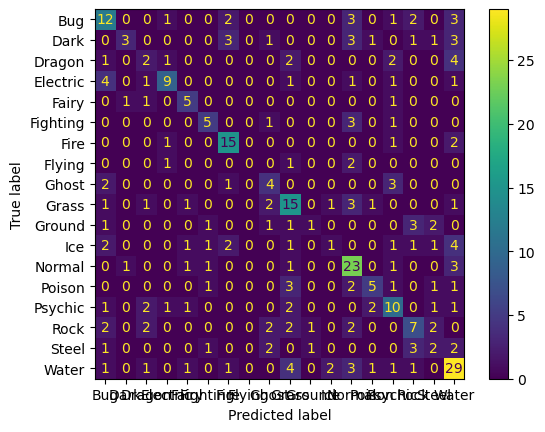

In [8]:
ConfusionMatrixDisplay.from_estimator(
    best_model, 
    X_test, 
    y_test, 
    values_format = 'd'
)